<a href="https://colab.research.google.com/github/ioxoiperez27/3project/blob/main/Module_3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# New Section

In [13]:
crimes = pd.read_csv('/CrimeData.csv', low_memory=False)

In [14]:
crimes

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,BD30
1,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,BJ30
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT,BI30
3,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,AF12
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,DA19
...,...,...,...,...,...,...,...,...
528991,202400000275616,02/23/2024 23:00,02/24/2024 05:15,MOTOR VEHICLE THEFT,13XX W MOHAWK LN,85027.0,SINGLE FAMILY HOUSE,EB26
528992,202400000275734,02/23/2024 23:00,02/24/2024 00:00,MOTOR VEHICLE THEFT,51XX W HOLLY ST,85035.0,STREET / ROADWAY / SIDEWALK,BD16
528993,202400000278524,02/23/2024 23:00,02/24/2024 06:00,BURGLARY,50XX E VAN BUREN ST,85008.0,OFFICE / COMMERCIAL BUILDING,BB39
528994,202400000275825,02/23/2024 23:22,02/23/2024 23:22,LARCENY-THEFT,106XX N 19TH AVE,85029.0,CONVENIENCE MARKET / STORE,CJ25


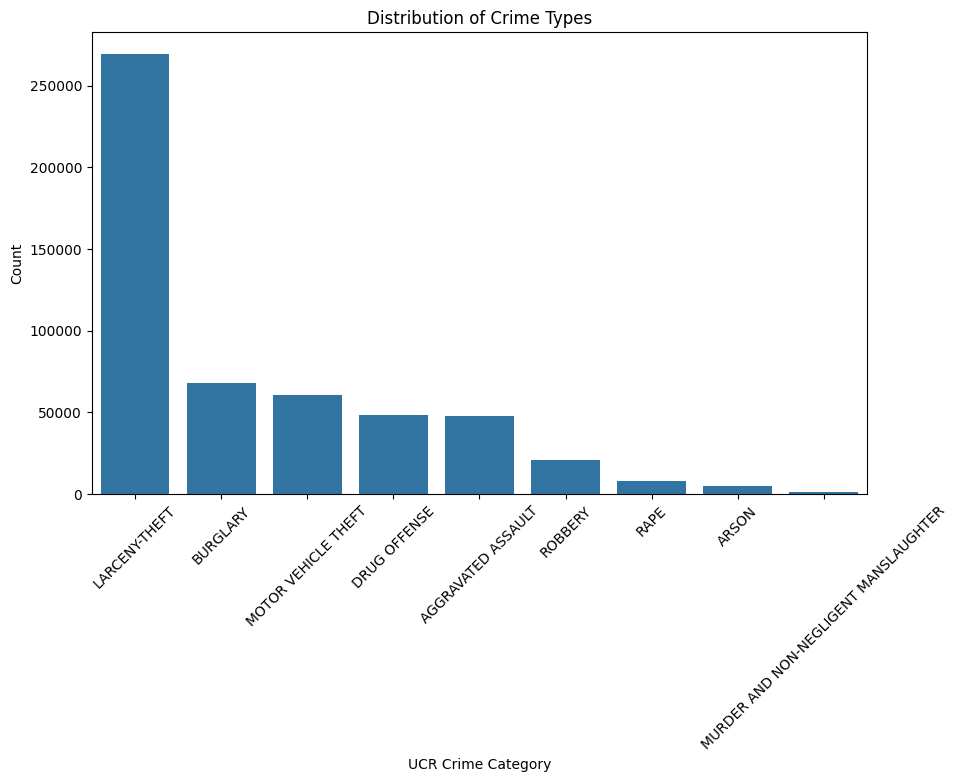

In [15]:
crime_type_counts = crimes['UCR CRIME CATEGORY'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values)
plt.title('Distribution of Crime Types')
plt.xlabel('UCR Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
area_crime_counts = crimes['ZIP'].value_counts()

** Below is a graph which shows the top 10 zip codes with the most crimes. **

In [19]:
top_10_crime_areas = area_crime_counts.head(10)

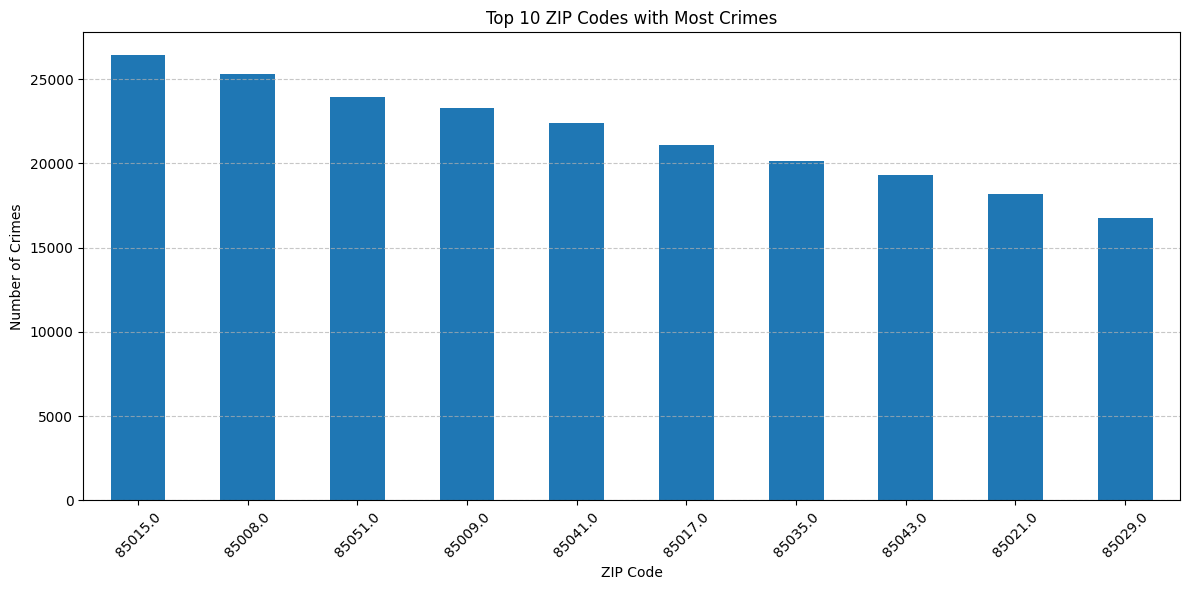

In [20]:
plt.figure(figsize=(12, 6))
top_10_crime_areas.plot(kind='bar')
plt.title('Top 10 ZIP Codes with Most Crimes')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We took the same data and transformed it into a table to make the values easier to read.

In [24]:
top_10_table = pd.DataFrame({'ZIP Code': top_10_crime_areas.index, 'Number of Crimes': top_10_crime_areas.values})
table_str = tabulate(top_10_table, headers='keys', tablefmt='grid')

In [25]:
print(table_str)

+----+------------+--------------------+
|    |   ZIP Code |   Number of Crimes |
+====+============+====================+
|  0 |      85015 |              26456 |
+----+------------+--------------------+
|  1 |      85008 |              25307 |
+----+------------+--------------------+
|  2 |      85051 |              23953 |
+----+------------+--------------------+
|  3 |      85009 |              23306 |
+----+------------+--------------------+
|  4 |      85041 |              22391 |
+----+------------+--------------------+
|  5 |      85017 |              21113 |
+----+------------+--------------------+
|  6 |      85035 |              20122 |
+----+------------+--------------------+
|  7 |      85043 |              19296 |
+----+------------+--------------------+
|  8 |      85021 |              18197 |
+----+------------+--------------------+
|  9 |      85029 |              16747 |
+----+------------+--------------------+


Below we will be looking at my attempot to make a graph with a trend line.

In [31]:
crimes['OCCURRED ON'] = pd.to_datetime(crimes['OCCURRED ON'])

In [33]:
crimes['YearMonth'] = crimes['OCCURRED ON'].dt.to_period('M')

In [34]:
monthly_crime_counts = crimes.groupby('YearMonth').size()

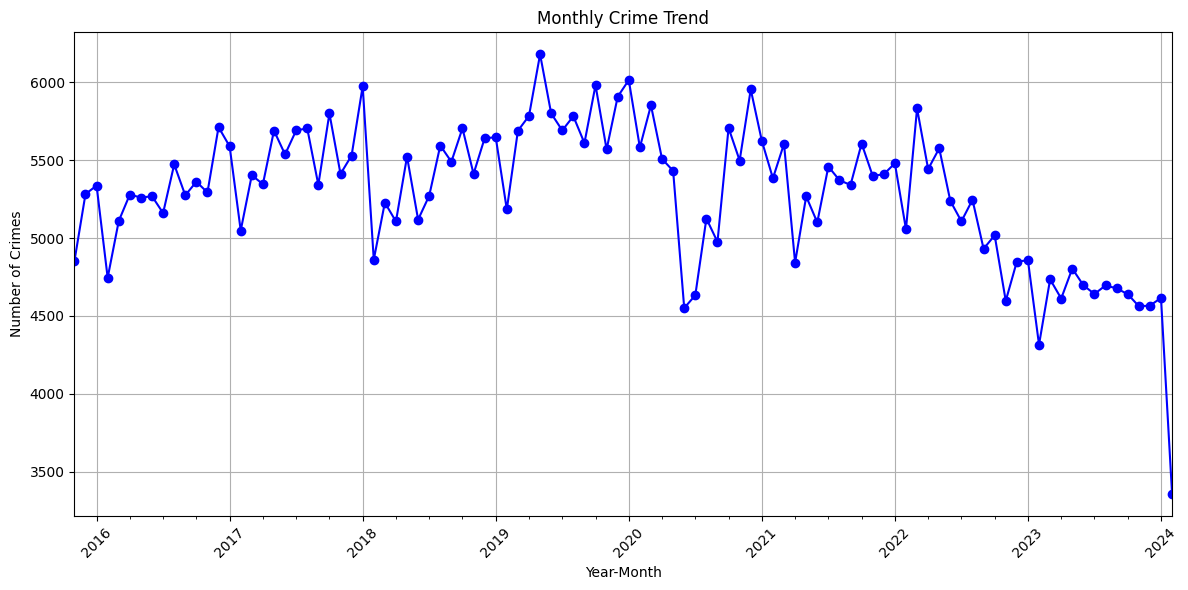

In [35]:
plt.figure(figsize=(12, 6))
monthly_crime_counts.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Crime Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()